In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## PV Data

5 seconds resolution MiRIS PV from 13/05/2019 to 21/06/2019.

In [2]:
pv = pd.read_csv('Data//miris_pv.csv', index_col=0, parse_dates=True)
pv.head()

,PV
DateTime,
2019-05-13 00:00:00+00:00,0.0
2019-05-13 00:00:05+00:00,0.0
2019-05-13 00:00:10+00:00,0.0
2019-05-13 00:00:15+00:00,0.0
2019-05-13 00:00:20+00:00,0.0


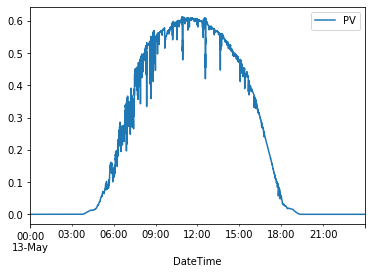

In [3]:
pv.loc['2019-05-13'].plot()
plt.show()

In [4]:
# Resampling the dataset from 5-seconds to 15-minutes resolution (using mean)
pv = pv.resample('15min').mean()
pv.head()

,PV
DateTime,
2019-05-13 00:00:00+00:00,0.0
2019-05-13 00:15:00+00:00,0.0
2019-05-13 00:30:00+00:00,0.0
2019-05-13 00:45:00+00:00,0.0
2019-05-13 01:00:00+00:00,0.0


In [5]:
pv.tail()

,PV
DateTime,
2019-06-20 22:45:00+00:00,0.0
2019-06-20 23:00:00+00:00,0.0
2019-06-20 23:15:00+00:00,0.0
2019-06-20 23:30:00+00:00,0.0
2019-06-20 23:45:00+00:00,0.0


In [6]:
pv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744 entries, 2019-05-13 00:00:00+00:00 to 2019-06-20 23:45:00+00:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PV      3744 non-null   float64
dtypes: float64(1)
memory usage: 58.5 KB


In [7]:
pv.describe().T

,count,mean,std,min,25%,50%,75%,max
PV,3744.0,0.160394,0.185385,0.0,0.0,0.067291,0.307134,0.647456


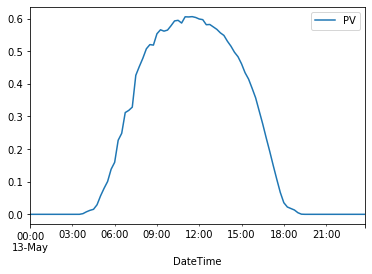

In [8]:
pv.loc['2019-05-13'].plot()
plt.show()

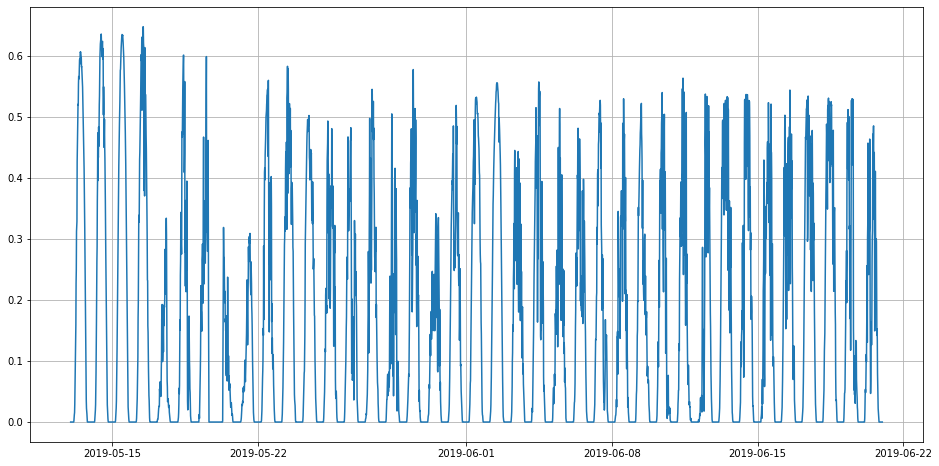

In [9]:
plt.figure(figsize=(16,8))
plt.plot(pv)
plt.grid()

## Weather Data

15-minute resolution weather data

The file is composed of forecast of several weather variables:

    CD = low clouds (0 to 1)
    CM = medium clouds (0 to 1)
    CU = high clouds (0 to 1)
    PREC = precipitation (mm / 15 min)
    RH2m = relative humidity (%)
    SNOW = snow height (mm)
    ST = Surface Temperature (°C)
    SWD = Global Horizontal Irradiance (W/m2)
    SWDtop = Total Solar Irradiance at the top of the atmosphere (W/m2)
    TT2M = temperature 2 meters above the ground (°C)
    WS100m = Wind speed at 100m from the ground (m/s)
    WS10m = Wind speed at 10m from the ground (m/s)

In [10]:
we = pd.read_csv('Data//weather_data.csv', index_col=0, parse_dates=True)
we.head()

,CD,CM,CU,PREC,RH2m,SNOW,ST,SWD,SWDtop,TT2M,WS100m,WS10m
Time,,,,,,,,,,,,
2019-05-10 00:00:00+02:00,0.13,0.0,0.0,0.0,75.15,0,7.99,0.0,0,9.49,6.87,2.49
2019-05-10 00:15:00+02:00,0.01,0.0,0.0,0.0,76.27,0,7.58,0.0,0,9.15,7.04,2.51
2019-05-10 00:30:00+02:00,0.01,0.0,0.0,0.0,76.66,0,7.49,0.0,0,9.05,8.03,3.17
2019-05-10 00:45:00+02:00,0.01,0.0,0.0,0.0,75.58,0,7.62,0.0,0,9.18,8.67,3.73
2019-05-10 01:00:00+02:00,0.01,0.0,0.0,0.0,74.53,0,7.65,0.0,0,9.23,9.08,3.97


In [11]:
we.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3745 entries, 2019-05-10 00:00:00+02:00 to 2019-06-18 00:00:00+02:00
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CD      3745 non-null   float64
 1   CM      3745 non-null   float64
 2   CU      3745 non-null   float64
 3   PREC    3745 non-null   float64
 4   RH2m    3745 non-null   float64
 5   SNOW    3745 non-null   int64  
 6   ST      3745 non-null   float64
 7   SWD     3745 non-null   float64
 8   SWDtop  3745 non-null   object 
 9   TT2M    3745 non-null   float64
 10  WS100m  3745 non-null   float64
 11  WS10m   3745 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 380.4+ KB


In [12]:
we.describe().T

,count,mean,std,min,25%,50%,75%,max
CD,3745.0,0.336438,0.430902,0.00,0.00,0.02,0.94,1.00
CM,3745.0,0.204158,0.369880,0.00,0.00,0.00,0.14,1.00
CU,3745.0,0.432451,0.468905,0.00,0.00,0.10,1.00,1.00
PREC,3745.0,0.031629,0.106125,0.00,0.00,0.00,0.02,2.03
RH2m,3745.0,71.290224,22.020615,20.82,51.10,73.39,93.07,100.00
SNOW,3745.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
ST,3745.0,15.465402,7.211917,-3.39,10.50,14.71,20.60,36.25
SWD,3745.0,219.446539,286.192330,0.00,0.00,47.52,412.81,895.75
TT2M,3745.0,14.831410,5.621230,-0.70,11.14,14.23,18.56,32.94
WS100m,3745.0,5.316077,2.532116,0.14,3.50,5.11,6.97,16.76


In [13]:
# Dropping SNOW and SWDtop from the dataset
we.drop('SNOW', axis=1, inplace=True)
we.drop('SWDtop', axis=1, inplace=True)

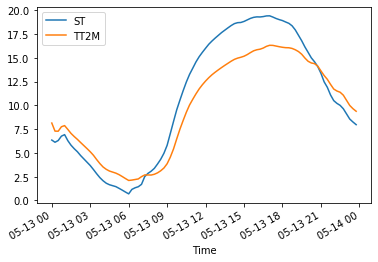

In [14]:
we[['ST', 'TT2M']].loc['2019-05-13'].plot()
plt.show()

In [15]:
X = we.loc['2019-05-13 00:00:00':'2019-06-18 00:00:00']
y = pv.loc['2019-05-13 00:00:00':'2019-06-18 00:00:00']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
y_preds = rfr.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, y_preds)

0.04758973372352993

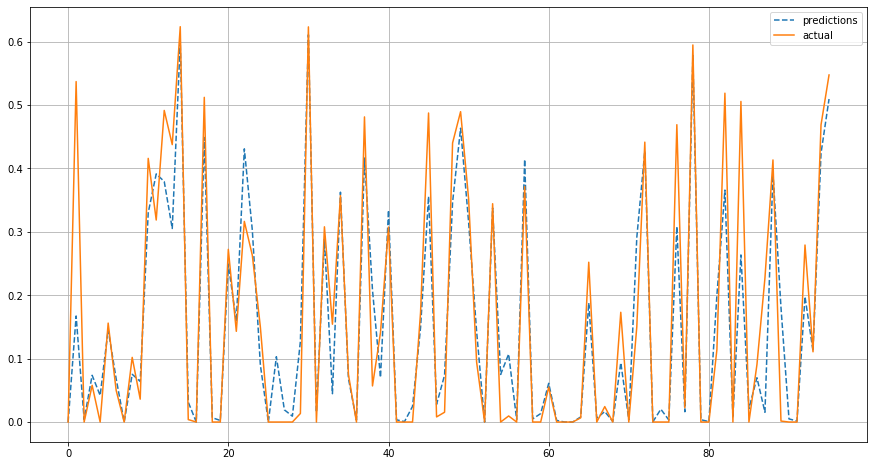

In [20]:
start = 1
end = start + 24*4
plt.figure(figsize=(15,8))
plt.plot(y_preds[start:end], ls='--', label='predictions')
plt.plot(y_test.iloc[start:end].values, label='actual')
plt.grid()
plt.legend();

In [23]:
import timeit
import datetime as dt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

In [24]:
time_start = timeit.default_timer()
parameters = {'n_estimators': [100, 500, 1000], 'max_depth': [1, 3, None]}
rfr_gs = GridSearchCV(estimator=RandomForestRegressor(criterion='mse'),
                     param_grid=parameters, cv=TimeSeriesSplit(n_splits=3),
                     n_jobs=-1)
rfr_gs.fit(X_train, y_train)
print(rfr_gs.best_params_)
time_end = timeit.default_timer()
time_elapsed = time_end - time_start
print('Execution time (hour:min:sec): {}'.format(str(dt.timedelta(seconds=time_elapsed))))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': None, 'n_estimators': 1000}
Execution time (hour:min:sec): 0:00:39.052539


In [26]:
rfr_opt = RandomForestRegressor(criterion='mse', **rfr_gs.best_params_)
rfr_opt.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [28]:
y_preds_opt = rfr_opt.predict(X_test)

In [29]:
mean_absolute_error(y_test, y_preds)

0.04758973372352993

In [30]:
mean_absolute_error(y_test, y_preds_opt)

0.04709553300067749

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfr, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rfr_scores = np.sqrt(-scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

In [35]:
rfr_scores

array([0.07449417, 0.0744719 , 0.08053049, 0.09339489, 0.07673523])

In [39]:
np.sqrt(mean_squared_error(y_test, y_preds))

0.07516856420698645